In [1]:
# plan

"""

1. Take json input 
2. Simulate huge sampling by monte cralo
3. Compare for each item the avg. rating at ith timestamp
4. Find the best product by comparing hits per timestamp
5. Plot and compare

"""

'\n\n1. Take json input \n2. Simulate huge sampling by monte cralo\n3. Compare for each item the avg. rating at ith timestamp\n4. Find the best product by comparing hits per timestamp\n5. Plot and compare\n\n'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json, random
import seaborn as sns
from itertools import permutations
import warnings
warnings.filterwarnings("ignore")

In [11]:
input_data = {
    
0 : {'name':'acer laptop',
     'ratings_dist' : [0.09, 0.01, 0.14, 0.15, 0.61],
     'num_ratings':388,
     'avg_rating':4.18
    },

1 : {'name':'lenovo laptop',
     'ratings_dist' : [0.07, 0.02, 0.04, 0.13, 0.74],
     'num_ratings':894,
     'avg_rating':4.4
    },

2: {'name':'hp laptop',
     'ratings_dist' : [0.05, 0.01, 0.06, 0.16, 0.72],
     'num_ratings':513,
     'avg_rating':4.5
    }


}

In [12]:
def run_monte_carlo_sim(dist, n, size=1000):
  simulated_avg_ratings = []
  for _ in range(size):
    dist = np.array(dist)
    vals = np.random.random(n).reshape(-1, 1)
    cumulated = dist.cumsum()
    ratings = 1 + np.argmax(vals < cumulated, axis = 1)
    simulated_avg_ratings.append(ratings.mean())
  return simulated_avg_ratings

# run_monte_carlo_sim(input_data[0]['ratings_dist'], input_data[0]['num_ratings'])

In [13]:
def choose_pop_size(input_data):
  max_rating = 0
  for k in input_data:
    ratings = input_data[k]['num_ratings']
    max_rating = max(max_rating, ratings)
  return max_rating#10 ** (len(str(max_rating)))

# choose_pop_size(input_data)

In [14]:
def main_plotter(input_data):
  names = []
  for k in input_data:
    data = input_data[k]['new_sample_ratings']
    sns.distplot(data, bins=20)
    plt.axvline(np.array(data).mean(), alpha=0.75, linestyle='--')
    names.append(input_data[k]['name'])
  plt.legend(names)
  plt.xlabel('avg.rating')
  plt.ylabel('density')
  plt.show()

In [25]:
def compare(a, b, names):
  a = np.array(a)
  b = np.array(b)
  rating_compare = (a > b).mean()
  if rating_compare < 0.5:
    a,b = b, a
    rating_compare = 1- rating_compare
    names.reverse()

  sns.distplot(a-b, bins=20)
  plt.axvline(0, alpha=0.75, linestyle='--')
  
  plt.legend(names)
  plt.title(f'avg : {rating_compare} [won : {names[0]} ]')
  plt.xlabel('avg.rating difference')
  plt.ylabel('density')
  plt.show()

def compare_plotter(input_data):
  perms = list(permutations(input_data.keys(),r=2))
  pairs = {}
  all_pairs = []
  for p in perms:
    p = sorted(list(p))
    if f'{p[0]}_{p[1]}' not in pairs:
      pairs[f'{p[0]}_{p[1]}']=0
      all_pairs.append(p)
  i = 1
  for p in all_pairs:
    name1 = input_data[p[0]]['name']
    name2 = input_data[p[1]]['name']
    print(f"{i} : {name1} vs {name2}")
    i+=1
    compare(input_data[p[0]]['new_sample_ratings'], input_data[p[1]]['new_sample_ratings'], [name1, name2])
    print('---------------------------------------------------------------------')

100%|██████████| 894/894 [00:00<00:00, 1527375.88it/s]




the best choice is :
 {"name": "hp laptop", "ratings_dist": [0.05, 0.01, 0.06, 0.16, 0.72], "num_ratings": 513, "avg_rating": 4.5}

***********************************************************************n

complete dist plot


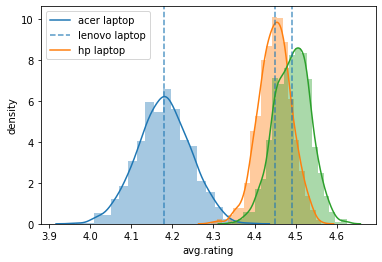


**********************************************************************

pair wise rating comparison plot

1 : acer laptop vs lenovo laptop


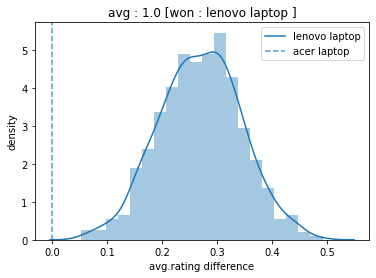

---------------------------------------------------------------------
2 : acer laptop vs hp laptop


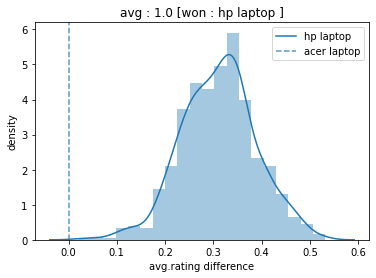

---------------------------------------------------------------------
3 : lenovo laptop vs hp laptop


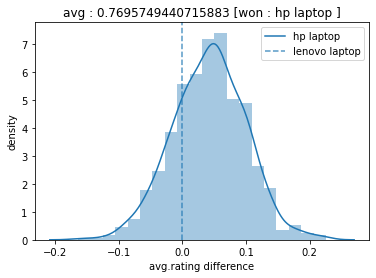

---------------------------------------------------------------------


In [26]:
def get_sim(input_data, thresh_size=50):
  size = choose_pop_size(input_data)

  for k in input_data:
    dist = input_data[k]['ratings_dist']
    n = input_data[k]['num_ratings']
    name = input_data[k]['name']
    if n < thresh_size:
        print(f"sample size of {n} for product : {name} is very small, might lead to inaccuracy")
    new_sample_rating = run_monte_carlo_sim(dist, n, size)
    input_data[k]['new_sample_ratings'] = new_sample_rating
  
  performance = {k:0 for k in input_data}
  for index in tqdm(range(size)):
    best_class = -1
    best_rating = -1
    for k in input_data:
      sim_rating_i = input_data[k]['new_sample_ratings'][index]

      if sim_rating_i > best_rating:
        best_rating = sim_rating_i
        best_class = k
  
    performance[best_class] += 1
  
  best_item = -1
  best_val = -1
  for p in performance:
    if best_val < performance[p]:
      best_val = performance[p]
      best_item = p

  result = input_data[best_item].copy()
  result.pop('new_sample_ratings')

  # print(performance)
  print("\n\nthe best choice is :\n", json.dumps(result))
  print('\n***********************************************************************n')
  print('\ncomplete dist plot')
  main_plotter(input_data)
  print('\n**********************************************************************\n')
  print('pair wise rating comparison plot\n')
  compare_plotter(input_data)

get_sim(input_data)